# 📊 Enhanced Admission Data Visualization Notebook
This notebook offers a rich and complex set of visualizations including breakdowns by Uganda's four major regions, gender, and performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('Cleaned_Admission_List.xlsx')
df.columns = df.columns.str.strip().str.lower().str.replace('.', '', regex=False)

## 🌍 Assign Regions to Districts

In [3]:
# Define region map (simplified for demo purposes)
central = ['KAMPALA', 'WAKISO', 'MPIGI', 'MUKONO']
eastern = ['JINJA', 'MBALE', 'SOROTI', 'TORORO']
northern = ['GULU', 'LIRA', 'KITGUM']
western = ['MBARARA', 'KABALE', 'BUSHENYI', 'FORT PORTAL']

def assign_region(dname):
    dname = str(dname).upper()
    if dname in central:
        return 'Central'
    elif dname in eastern:
        return 'Eastern'
    elif dname in northern:
        return 'Northern'
    elif dname in western:
        return 'Western'
    else:
        return 'Other'

df['region'] = df['dname'].apply(assign_region)

## 🧑‍🤝‍🧑 Gender Distribution by Region

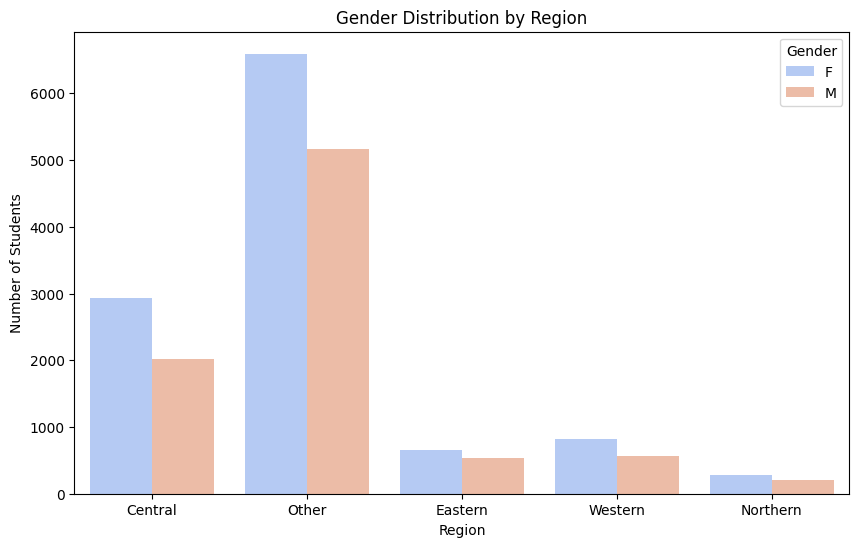

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='region', hue='ge', palette='coolwarm')
plt.title('Gender Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.show()

## 🥧 Regional Share of All Applicants

In [5]:
fig = px.pie(df, names='region', title='Applicant Distribution by Region', hole=0.4, color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## 📈 Histogram & KDE: Total Weight by Region

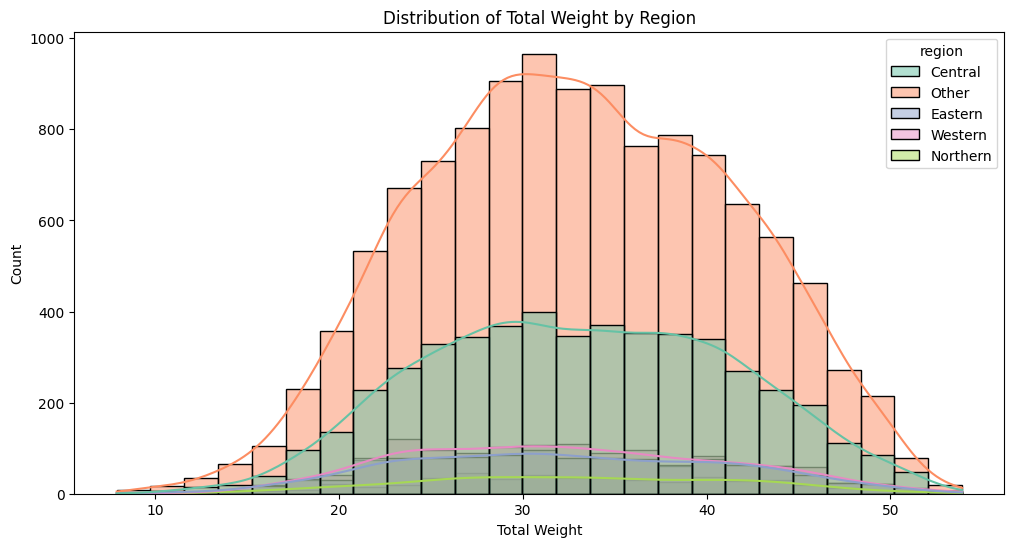

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='tot_wt', hue='region', kde=True, bins=25, palette='Set2')
plt.title('Distribution of Total Weight by Region')
plt.xlabel('Total Weight')
plt.ylabel('Count')
plt.show()

## 🔥 Correlation Heatmap with Encoded Categories

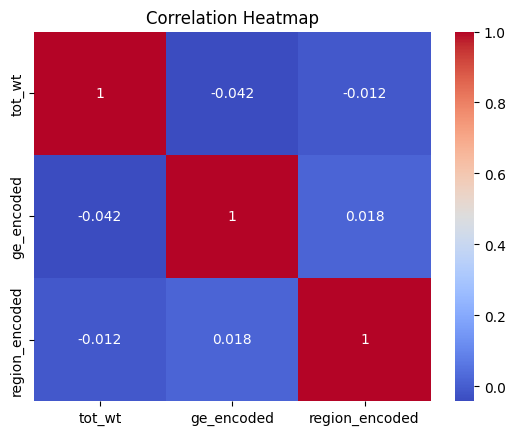

In [7]:
# Encoding for correlation
df['ge_encoded'] = LabelEncoder().fit_transform(df['ge'])
df['region_encoded'] = LabelEncoder().fit_transform(df['region'])
corr = df[['tot_wt', 'ge_encoded', 'region_encoded']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 📚 Most Popular Courses by Region

In [8]:
course_region = df.groupby(['region', 'course_name']).size().reset_index(name='count')
fig = px.bar(course_region, x='count', y='course_name', color='region', orientation='h',
             title='Popular Courses by Region', height=600)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## 🎻 Violin Plot: Total Weight by Region & Gender

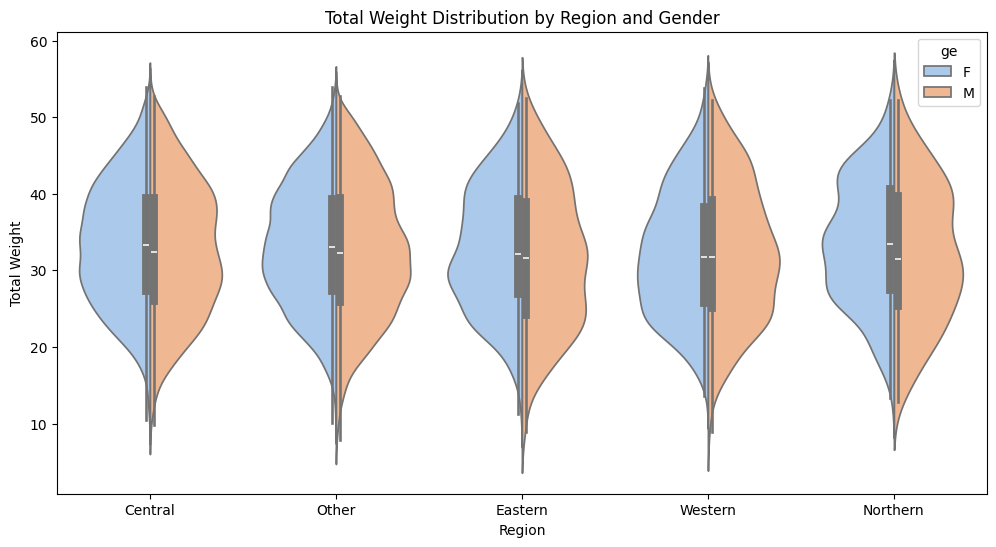

In [9]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='region', y='tot_wt', hue='ge', split=True, palette='pastel')
plt.title('Total Weight Distribution by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Total Weight')
plt.show()

## 🧪 Pairplot of Key Features

KeyError: 'ge'

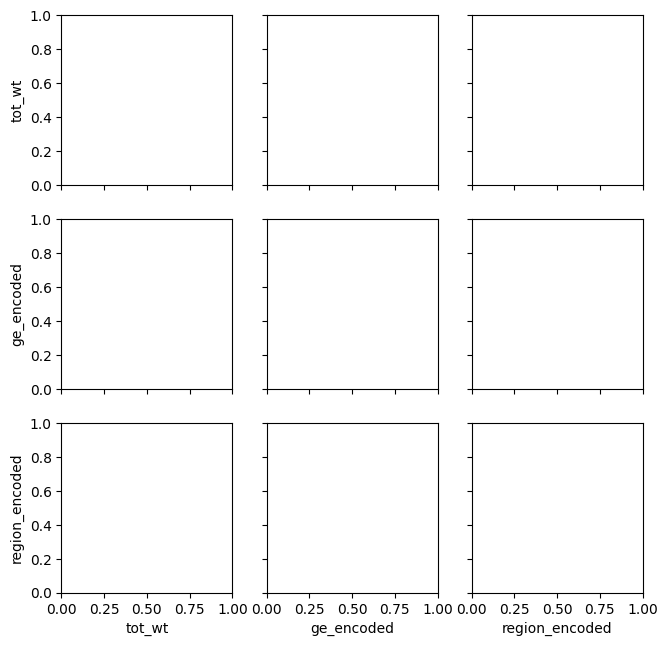

In [10]:
sns.pairplot(df[['tot_wt', 'ge_encoded', 'region_encoded']], hue='ge')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

## ✅ End of Visualizations
This concludes the set of advanced visualizations to support deeper insights into the admissions dataset.